In [1]:
#First citation and references

%load_ext autoreload
%autoreload 2

import pandas as pd
pd.options.mode.chained_assignment = None #SettingWithCopyWarning in Pandas
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

import matplotlib.pyplot as plt
import os

#Below used to create a simple pitch from https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib
from matplotlib.patches import Arc
from matplotlib.patches import Rectangle

In [2]:
#First citation and references

# Import some classes that I shamelessly borrowed from https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking
import Metrica_IO as mio
import Metrica_Viz as mviz

In [3]:
#First citation and references

# set up initial path to data
DATADIR = os.path.join("sample-data","data")
game_id = 2 # let's look at sample match 2

In [4]:
#First citation and references

# read in the event data
events = mio.read_event_data(DATADIR,game_id)

In [5]:
#First citation and references

# Bit of housekeeping: unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)

In [6]:
#First citation and references

events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,4.24,-18.36,-22.26,17.68
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,-20.14,13.60,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,-19.08,13.60,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,-16.96,12.24,NaN,NaN


In [7]:
#First citation and references

tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

# # plot player positions at ,atckick-off
# KO_Frame = events.loc[0]['Start Frame']
# fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )



Reading team: home
Reading team: away


Text(0.0, -34.68, '')

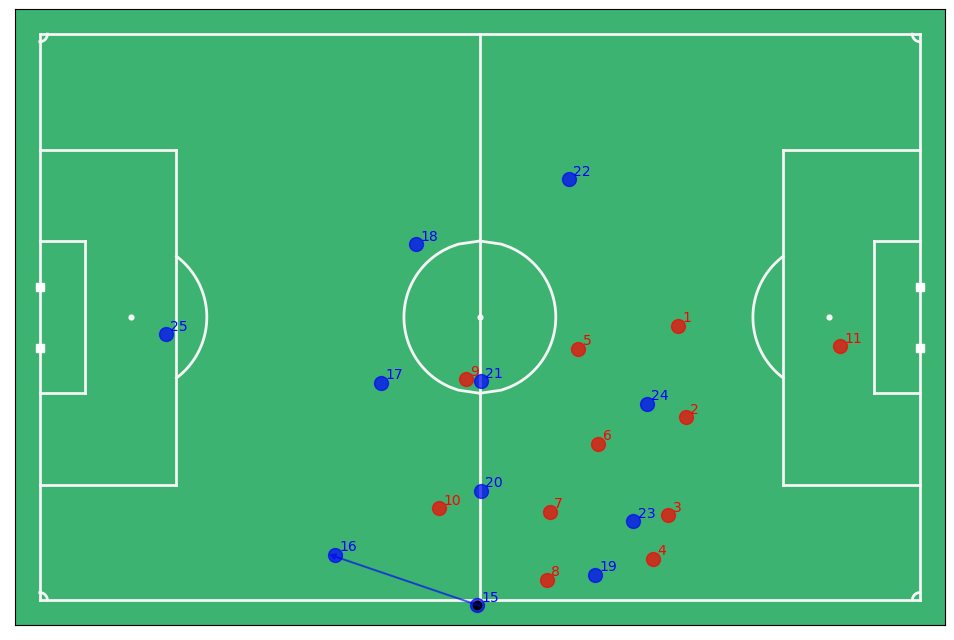

In [8]:
#First citation and references

# We can also plot a single pass and all the positions of each team
passes = events.loc[events["Type"]=="PASS"]

pass_of_interest_loc = 12
pass_frame_number = passes.loc[pass_of_interest_loc]["Start Frame"]

fig, ax = mviz.plot_frame( tracking_home.loc[pass_frame_number], tracking_away.loc[pass_frame_number] ,annotate=True)
ax.annotate("", xy=passes.loc[pass_of_interest_loc][['End X', 'End Y']], xytext=passes.loc[pass_of_interest_loc][['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)


In [9]:
#Code for calculating the initial Impact Factors (I.F.), intercepted passes, potential assists
# and Grand Impact Factor for each player in the Home/Red team

final_dfs=[]

playerlista=["Player1","Player2","Player3","Player4","Player5","Player6","Player7","Player8","Player9","Player10"]

period_num=[1,2]

#Creating for loop for each period
for j in period_num:
    
    #Creating if statements, because code for period 1 is different from code from period 2
    if j==2:
        
        #Creating for loop for each player
        for i in range(len(playerlista)):

            #Getting all the passes made from each player, in 2nd period
            a=events.loc[(events["Period"]==2) & (events["Type"]=="PASS") & (events["From"]==playerlista[i])]

            #Passes from which region?
            from0=(a["Start X"]<0)
            from1=(a["Start X"]>=0) & (a["Start X"]<19.2)
            from2=(a["Start X"]>=38.4) & ((a["Start Y"]<-17.8) | (a["Start Y"]>17.8))
            from3=(a["Start X"]>=19.2) & (a["Start X"]<38.4)
            from4=(a["Start X"]>=48.15) & ((a["Start Y"]>=-17.8) | (a["Start Y"]<=17.8))
            from5=(a["Start X"]>=38.4) & (a["Start X"]<48.15) & (a["Start Y"]>=-17.8) & (a["Start Y"]<=17.8)
            from6=(a["Start X"]>=48.15) & (a["Start Y"]>=-8.1) & (a["Start Y"]<=8.1)

            #Passes to which region?
            to0=(a["End X"]<0)
            to1=(a["End X"]>=0) & (a["End X"]<19.2)
            to2=(a["End X"]>=38.4) & ((a["End Y"]>17.8)|(a["End Y"]<-17.8))
            to3=(a["End X"]>=19.2) & (a["End X"]<38.4)
            to4=(a["End X"]>=48.15) & (((a["End Y"]>8.1) & (a["End Y"]<=17.8))|((a["End Y"]>=-17.8) & a["End Y"]<-8.1))
            to5=(a["End X"]>=38.4) & (a["End X"]<48.15) & (a["End Y"]>=-17.8) & (a["End Y"]<=17.8)
            to6=(a["End X"]>=48.15) & (a["End Y"]>=-8.1) & (a["End Y"]<=8.1)


            passesfrom=[from0,from1,from2,from3,from4,from5,from6]
            passesto=[to0,to1,to2,to3,to4,to5,to6]

            
            #Converting the "From Zone" into "Passes from" for each pass, made by each player
            for j in range(len(passesfrom)):
                a.loc[passesfrom[j], "From Zone"]=j

            
            #Converting the "To Zone" into "Passes from" for each pass, made by each player
            for k in range(len(passesto)):
                a.loc[passesto[k], "To Zone"]= k

            
            #Equation for Initial Impact Factor
            a["Impact Factor"]=a["To Zone"]-a["From Zone"]



            #Intercepted passes
            c=events.loc[(events["Type"]=="BALL LOST")&((events["Subtype"]=="INTERCEPTION")|(events["Subtype"]=="HEAD-INTERCEPTION"))
                         &(events["From"]==playerlista[i])&(events["Period"]==1)]


            #Potential attempted assists
            e=events.loc[(events["Type"]!="CHALLENGE")&(events["Type"]!="BALL LOST")&(events["Type"]!="RECOVERY")& 
                         (events["Subtype"]!="BLOCKED")]
            f=e.loc[(e["Type"]=="SHOT").shift(-1).fillna(False)&(e["Type"]=="PASS")&(e["From"]==playerlista[i])&(e["Period"]==1)]

            
            
            #Creating dataframe for all the initial Impact Factors, intercepted passes, potential assits and grand impact
            #factor, in period 2
            df=pd.DataFrame([[2,playerlista[i],a["Impact Factor"].sum(),len(c),len(f),
                               (a["Impact Factor"].sum()-2*len(c)+2*len(f))]],columns=["Period","From","Initial I.F.","Intercepted Passes","Potential Assists","Grand I.F."])
            
            final_dfs.append(df)
            
            
            
            
    #Else statement for period 1
    else:
        
        #Creating for loop for each player
        for i in range(len(playerlista)):
            
            #Getting all the passes made from each player, in 1st period
            b=events.loc[(events["Period"]==1) & (events["Type"]=="PASS") & (events["From"]==playerlista[i])]

            #Passes from which region?
            from0=(b["Start X"]>0)
            from1=(b["Start X"]<=0) & (b["Start X"]>-19.2)
            from2=(b["Start X"]<=-38.4) & ((b["Start Y"]<-17.8) | (b["Start Y"]>17.8))
            from3=(b["Start X"]<=-19.2) & (b["Start X"]>-38.4)
            from4=(b["Start X"]<=-48.15) & ((b["Start Y"]>=-17.8) | (b["Start Y"]<=17.8))
            from5=(b["Start X"]<=-38.4) & (b["Start X"]>-48.15) & (b["Start Y"]>=-17.8) & (b["Start Y"]<=17.8)
            from6=(b["Start X"]<=-48.15) & (b["Start Y"]>=-8.1) & (b["Start Y"]<=8.1)

            #Passes to which region?
            to0=(b["End X"]>0)
            to1=(b["End X"]<=0) & (b["End X"]>-19.2)
            to2=(b["End X"]<=-38.4) & ((b["End Y"]<-17.8) | (b["End Y"]>17.8))
            to3=(b["End X"]<=-19.2) & (b["End X"]>-38.4)
            to4=(b["End X"]<=-48.15) & ((b["End Y"]>=-17.8) | (b["End Y"]<=17.8))
            to5=(b["End X"]<=-38.4) & (b["End X"]>-48.15) & (b["End Y"]>=-17.8) & (b["End Y"]<=17.8)
            to6=(b["End X"]<=-48.15) & (b["End Y"]>=-8.1) & (b["End Y"]<=8.1)


            passesfrom=[from0,from1,from2,from3,from4,from5,from6]
            passesto=[to0,to1,to2,to3,to4,to5,to6]


            #Converting the "From Zone" into "Passes from" for each pass, made by each player
            for j in range(len(passesfrom)):
                b.loc[passesfrom[j], "From Zone"]=j

            #Converting the "To Zone" into "Passes from" for each pass, made by each player
            for k in range(len(passesto)):
                b.loc[passesto[k], "To Zone"]=k

            
            #Equation for Initial Impact Factor
            b["Impact Factor"]=b["To Zone"]-b["From Zone"]


            #Intercepted passes
            d=events.loc[(events["Type"]=="BALL LOST")&((events["Subtype"]=="INTERCEPTION")|(events["Subtype"]=="HEAD-INTERCEPTION"))
                         &(events["From"]==playerlista[i])&(events["Period"]==2)]


            #Potential attempted assists
            g=events.loc[(events["Type"]!="CHALLENGE")&(events["Type"]!="BALL LOST")&(events["Type"]!="RECOVERY")& 
                         (events["Subtype"]!="BLOCKED")]
            h=g.loc[(g["Type"]=="SHOT").shift(-1).fillna(False)&(g["Type"]=="PASS")&(g["From"]==playerlista[i]) &(g["Period"]==2)]
            

            
            #Creating dataframe for all the initial Impact Factors, intercepted passes, potential assits and grand impact
            #factor, in period 1
            df=pd.DataFrame([[1,playerlista[i],b["Impact Factor"].sum(),len(d),len(h),
                               (b["Impact Factor"].sum()-2*len(d)+2*len(h))]],columns=["Period","From","Initial I.F.","Intercepted Passes","Potential Assists","Grand I.F."])
            
            final_dfs.append(df)
            
        
#Concatinating the table of Period 1 and 2 together
final_dfhome=pd.concat(final_dfs)


In [10]:
final_dfhome

,Period,From,Initial I.F.,Intercepted Passes,Potential Assists,Grand I.F.
0,1,Player1,6.0,1,1,6.0
0,1,Player2,3.0,2,0,-1.0
0,1,Player3,4.0,3,0,-2.0
0,1,Player4,20.0,1,0,18.0
0,1,Player5,3.0,4,0,-5.0
0,1,Player6,0.0,1,0,-2.0
0,1,Player7,-2.0,2,0,-6.0
0,1,Player8,1.0,4,1,-5.0
0,1,Player9,-3.0,4,1,-9.0
0,1,Player10,-2.0,5,1,-10.0


In [11]:
#Code for calculating the initial Impact Factors (I.F.), intercepted passes, potential assists
# and Grand Impact Factor for each player in the Away/Blue team

final_dfs=[]

playerlistb=["Player15","Player16","Player17","Player18","Player19","Player20","Player21","Player22","Player23","Player24"]

period_num=[1,2]

#Creating for loop for each period
for j in period_num:
    
    #Creating if statements, because code for period 1 is different from code from period 2
    if j==1:
        
        #Creating for loop for each player
        for i in range(len(playerlistb)):

            #Getting all the passes made from each player, in 1st period
            a=events.loc[(events["Period"]==1) & (events["Type"]=="PASS") & (events["From"]==playerlistb[i])]

            #Passes from which region?
            from0=(a["Start X"]<0)
            from1=(a["Start X"]>=0) & (a["Start X"]<19.2)
            from2=(a["Start X"]>=38.4) & ((a["Start Y"]<-17.8) | (a["Start Y"]>17.8))
            from3=(a["Start X"]>=19.2) & (a["Start X"]<38.4)
            from4=(a["Start X"]>=48.15) & ((a["Start Y"]>=-17.8) | (a["Start Y"]<=17.8))
            from5=(a["Start X"]>=38.4) & (a["Start X"]<48.15) & (a["Start Y"]>=-17.8) & (a["Start Y"]<=17.8)
            from6=(a["Start X"]>=48.15) & (a["Start Y"]>=-8.1) & (a["Start Y"]<=8.1)

            #Passes to which region?
            to0=(a["End X"]<0)
            to1=(a["End X"]>=0) & (a["End X"]<19.2)
            to2=(a["End X"]>=38.4) & ((a["End Y"]>17.8)|(a["End Y"]<-17.8))
            to3=(a["End X"]>=19.2) & (a["End X"]<38.4)
            to4=(a["End X"]>=48.15) & (((a["End Y"]>8.1) & (a["End Y"]<=17.8))|((a["End Y"]>=-17.8) & a["End Y"]<-8.1))
            to5=(a["End X"]>=38.4) & (a["End X"]<48.15) & (a["End Y"]>=-17.8) & (a["End Y"]<=17.8)
            to6=(a["End X"]>=48.15) & (a["End Y"]>=-8.1) & (a["End Y"]<=8.1)


            passesfrom=[from0,from1,from2,from3,from4,from5,from6]
            passesto=[to0,to1,to2,to3,to4,to5,to6]


            #Converting the "From Zone" into "Passes from" for each pass, made by each player
            for j in range(len(passesfrom)):
                a.loc[passesfrom[j], "From Zone"]=j

            #Converting the "To Zone" into "Passes from" for each pass, made by each player
            for k in range(len(passesto)):
                a.loc[passesto[k], "To Zone"]= k

            #Equation for Initial Impact Factor
            a["Impact Factor"]=a["To Zone"]-a["From Zone"]


            #Intercepted balls
            c=events.loc[(events["Type"]=="BALL LOST")&((events["Subtype"]=="INTERCEPTION")|(events["Subtype"]=="HEAD-INTERCEPTION"))
                         &(events["From"]==playerlistb[i])&(events["Period"]==1)]


            #Potential assists
            e=events.loc[(events["Type"]!="CHALLENGE")&(events["Type"]!="BALL LOST")&(events["Type"]!="RECOVERY")& 
                         (events["Subtype"]!="BLOCKED")]
            f=e.loc[(e["Type"]=="SHOT").shift(-1).fillna(False)&(e["Type"]=="PASS")&(e["From"]==playerlistb[i])&(e["Period"]==1)]

            
            #Creating dataframe for all the initial Impact Factors, intercepted passes, potential assits and grand impact
            #factor, in period 1
            df=pd.DataFrame([[1,playerlistb[i],a["Impact Factor"].sum(),len(c),len(f),
                               (a["Impact Factor"].sum()-2*len(c)+2*len(f))]],columns=["Period","From","Initial I.F.","Intercepted Passes","Potential Assists","Grand I.F."])
            
            final_dfs.append(df)
            
    
    #Else statement for period 2        
    else:
        
        #Creating for loop for each player
        for i in range(len(playerlistb)):
            
            #Getting all the passes made from each player, in 2nd period
            b=events.loc[(events["Period"]==2) & (events["Type"]=="PASS") & (events["From"]==playerlistb[i])]

            #Passes from
            from0=(b["Start X"]>0)
            from1=(b["Start X"]<=0) & (b["Start X"]>-19.2)
            from2=(b["Start X"]<=-38.4) & ((b["Start Y"]<-17.8) | (b["Start Y"]>17.8))
            from3=(b["Start X"]<=-19.2) & (b["Start X"]>-38.4)
            from4=(b["Start X"]<=-48.15) & ((b["Start Y"]>=-17.8) | (b["Start Y"]<=17.8))
            from5=(b["Start X"]<=-38.4) & (b["Start X"]>-48.15) & (b["Start Y"]>=-17.8) & (b["Start Y"]<=17.8)
            from6=(b["Start X"]<=-48.15) & (b["Start Y"]>=-8.1) & (b["Start Y"]<=8.1)

            #Passes to
            to0=(b["End X"]>0)
            to1=(b["End X"]<=0) & (b["End X"]>-19.2)
            to2=(b["End X"]<=-38.4) & ((b["End Y"]<-17.8) | (b["End Y"]>17.8))
            to3=(b["End X"]<=-19.2) & (b["End X"]>-38.4)
            to4=(b["End X"]<=-48.15) & ((b["End Y"]>=-17.8) | (b["End Y"]<=17.8))
            to5=(b["End X"]<=-38.4) & (b["End X"]>-48.15) & (b["End Y"]>=-17.8) & (b["End Y"]<=17.8)
            to6=(b["End X"]<=-48.15) & (b["End Y"]>=-8.1) & (b["End Y"]<=8.1)


            passesfrom=[from0,from1,from2,from3,from4,from5,from6]
            passesto=[to0,to1,to2,to3,to4,to5,to6]

            #Converting the "From Zone" into "Passes from" for each pass, made by each player
            for j in range(len(passesfrom)):
                b.loc[passesfrom[j], "From Zone"]=j

            #Converting the "To Zone" into "Passes from" for each pass, made by each player
            for k in range(len(passesto)):
                b.loc[passesto[k], "To Zone"]=k

            #Equation for Initial Impact Factor
            b["Impact Factor"]=b["To Zone"]-b["From Zone"]


            #Intercepted passes
            d=events.loc[(events["Type"]=="BALL LOST")&((events["Subtype"]=="INTERCEPTION")|(events["Subtype"]=="HEAD-INTERCEPTION"))
                         &(events["From"]==playerlistb[i])&(events["Period"]==2)]


            #Potential assists
            g=events.loc[(events["Type"]!="CHALLENGE")&(events["Type"]!="BALL LOST")&(events["Type"]!="RECOVERY")& 
                         (events["Subtype"]!="BLOCKED")]
            h=g.loc[(g["Type"]=="SHOT").shift(-1).fillna(False)&(g["Type"]=="PASS")&(g["From"]==playerlistb[i]) &(g["Period"]==2)]


            #Creating dataframe for all the initial Impact Factors, intercepted passes, potential assits and grand impact
            #factor, in period 2
            df=pd.DataFrame([[2,playerlistb[i],b["Impact Factor"].sum(),len(d),len(h),
                               (b["Impact Factor"].sum()-2*len(d)+2*len(h))]],columns=["Period","From","Initial I.F.","Intercepted Passes","Potential Assists","Grand I.F."])
            
            final_dfs.append(df)
            
final_dfaway=pd.concat(final_dfs)

In [12]:
final_dfaway

,Period,From,Initial I.F.,Intercepted Passes,Potential Assists,Grand I.F.
0,1,Player15,1.0,5,0,-9.0
0,1,Player16,3.0,5,0,-7.0
0,1,Player17,4.0,1,0,2.0
0,1,Player18,6.0,5,1,-2.0
0,1,Player19,-1.0,3,0,-7.0
0,1,Player20,14.0,3,0,8.0
0,1,Player21,7.0,3,0,1.0
0,1,Player22,-5.0,3,1,-9.0
0,1,Player23,-3.0,2,1,-5.0
0,1,Player24,0.0,4,0,-8.0


Bar chart of players from the Home Team, at period 1


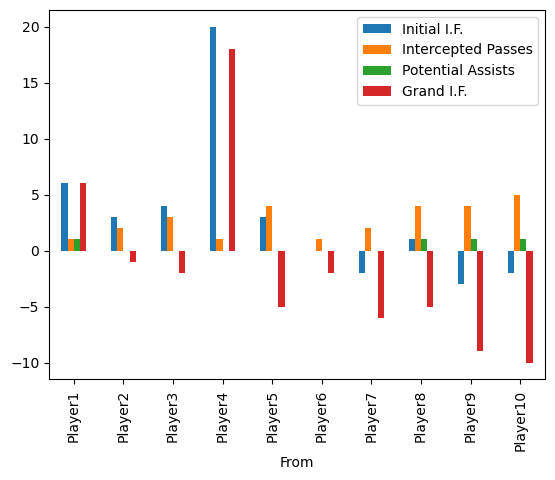

Bar chart of players from the Home Team, at period 2


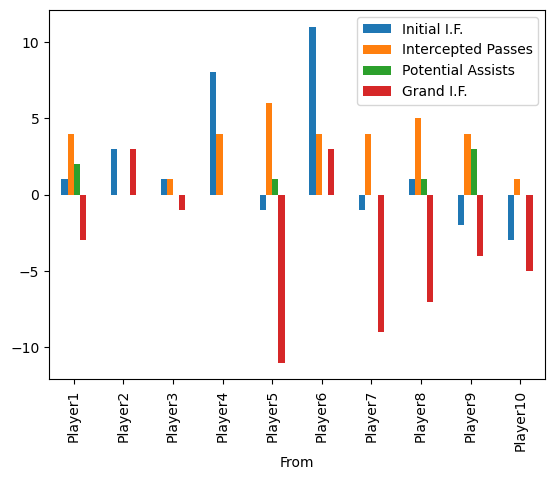

Bar chart of players from the Away Team, at period 1


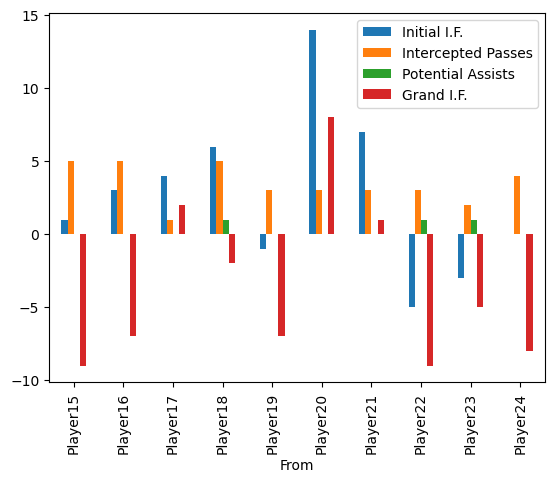

Bar chart of players from the Away Team, at period 2


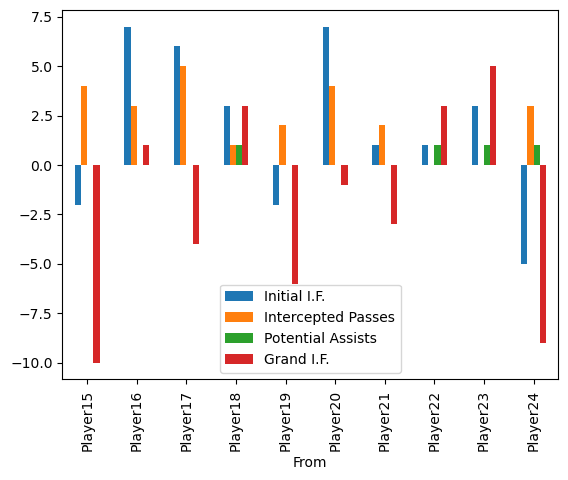

In [13]:
#Below, I'm making group bar charts with the dataset of each player, for each team

period_num=[1,2]
df=[final_dfhome,final_dfaway]

#For loop for each team
for j in range(len(df)):
    
    #For loop for each period
    for i in period_num:
        
        per1=df[j][df[j]['Period']==i] #Selecting dataset from Period i
        
        #Making a bar chart
        per1.reset_index().plot(x="From", y=["Initial I.F.", "Intercepted Passes", "Potential Assists", "Grand I.F."], kind="bar")
        
        #For the Home team
        if j==0:
            print("Bar chart of players from the Home Team, at period",i)
            plt.show()
        
        #For the Away team
        else:
            print("Bar chart of players from the Away Team, at period",i)
            plt.show()

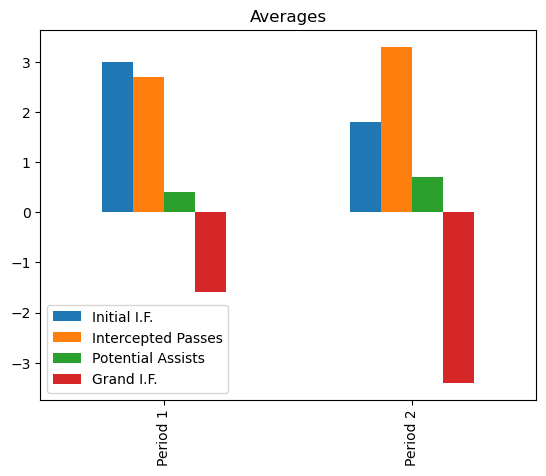

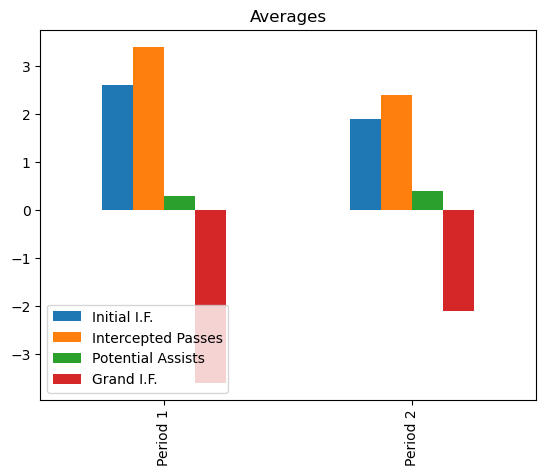

In [14]:
period_num=[1,2]
df=[final_dfhome,final_dfaway]

#For loop for each team
for j in range(len(df)):
    
    #For loop for each period
    for i in period_num:

        #Doing a dataframe
        per=df[j][df[j]['Period']==i]
        per_avg=per[["Initial I.F.", "Intercepted Passes", "Potential Assists", "Grand I.F."]].mean()
        if i==1:
            a=pd.DataFrame(per_avg,columns=['Period 1'])

        else:
            b=pd.DataFrame(per_avg,columns=['Period 2'])

    #Concatenating both dataframes into a group bar chart
    c=pd.concat([a,b],axis=1).T
    c.plot.bar(title="Averages")    


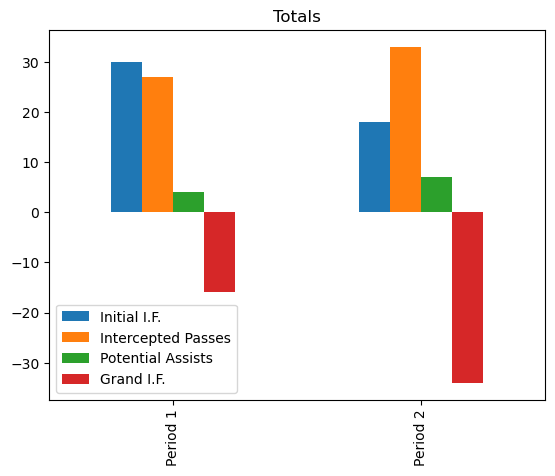

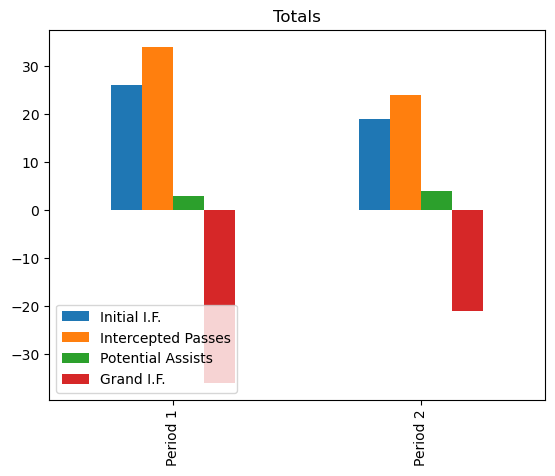

In [15]:
period_num=[1,2]
df=[final_dfhome,final_dfaway]

#For loop for each team
for j in range(len(df)):
    
    #For loop for each period
    for i in period_num:

        #Doing a dataframe
        per=df[j][df[j]['Period']==i]
        per_total=per[["Initial I.F.", "Intercepted Passes", "Potential Assists", "Grand I.F."]].sum()
        if i==1:
            a=pd.DataFrame(per_total,columns=['Period 1'])

        else:
            b=pd.DataFrame(per_total,columns=['Period 2'])

    #Concatenating both dataframes into a group bar chart
    c=pd.concat([a,b],axis=1).T
    c.plot.bar(title="Totals")    

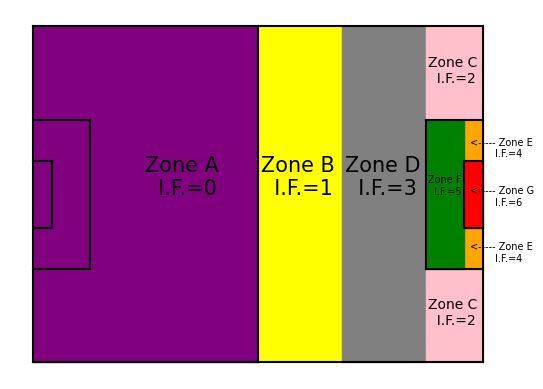

In [16]:
#Everything below is from https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib
#Except for one part, where I implement my own code to colour the regions, in which I showed where I wrote.

def createPitch():
    
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")
    
    #Prepare rectangles
    zone0=Rectangle((0,0),65,90,color="purple")
    zone1=Rectangle((65,0),24.25,90,color="yellow")
    zone3=Rectangle((89.25,0),24.25,90,color="grey")
    zone2a=Rectangle((113.5,65), 16.5,25, color='pink')
    zone2b=Rectangle((113.5,0), 16.5,25, color='pink')
    zone4a=Rectangle((124.5,54), 5.5,11, color='orange')
    zone4b=Rectangle((124.5,25), 5.5,11, color='orange')
    zone5=Rectangle((113.5,25),11,40, color='green')
    zone6=Rectangle((124.5,36),5.5,18, color='red')
    

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    
    
    #Everything above is from https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib
    
    
    
    #Here is where I implement my own code.
    ax.add_patch(zone0)
    ax.add_patch(zone1)
    ax.add_patch(zone3)
    ax.add_patch(zone2a)
    ax.add_patch(zone2b)
    ax.add_patch(zone4a)
    ax.add_patch(zone4b)
    ax.add_patch(zone5)
    ax.add_patch(zone6)
    
    plt.text(32.5,45, 'Zone A\n  I.F.=0', dict(size=15), color="black")
    plt.text(66,45, 'Zone B\n  I.F.=1', dict(size=15), color="black")
    plt.text(90,45, 'Zone D\n  I.F.=3', dict(size=15), color="black")
    plt.text(114,75, 'Zone C\n  I.F.=2', dict(size=10), color="black")
    plt.text(114,10, 'Zone C\n  I.F.=2', dict(size=10), color="black")
    plt.text(114,45, 'Zone F\n  I.F.=5', dict(size=7), color="black")
    plt.text(126,55, '<----- Zone E\n        I.F.=4', dict(size=7), color="black")
    plt.text(126,27, '<----- Zone E\n        I.F.=4', dict(size=7), color="black")
    plt.text(126,42, '<----- Zone G\n        I.F.=6', dict(size=7), color="black")
    
    #Above is where I stoped my code
    
    
    
    #Display Pitch
    plt.show()
    
createPitch()